# Planar data classification with one hidden layer

- NN with one hidden layer
- activation functino: tanh, ReLU

# 1 - Packages

In [167]:
import numpy as np
import matplotlib.pyplot as plt
# from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
# from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

# 2 - Dataset

```python
np.random.seed(1)
```

原来每次运行代码时设置相同的seed，则每次生成的随机数也相同，如果不设置seed，则每次生成的随机数都会不一样


X: 2 * 400
Y: 1 * 400

- 400 samples
- 2 features

[[ 1.20444229e+00  1.58709904e-01  9.52471960e-02  3.49178475e-01
   6.94150378e-01  1.62065038e+00  1.53856225e+00  3.63085641e-02
   4.74591109e-01  1.65695828e-01  1.66446249e+00  8.40285720e-01
   2.61695163e-01  2.31614896e-01  1.58013020e+00  6.35509950e-03
   6.80610419e-01  1.21400432e-01  1.13281261e+00  1.61505892e+00
   1.66454441e-01  1.72438241e+00  1.88667246e+00  1.72327227e+00
   1.54661332e+00  9.84590400e-01  1.45313345e+00  7.49043388e-01
   1.45048341e+00  1.64287865e+00  1.28141487e+00  1.59574104e+00
   1.46298294e+00  1.46629048e+00  1.54348961e+00  1.57013416e+00
   1.22995404e+00  1.31142345e+00 -1.99364553e+00  3.94564752e-01
   1.51715449e+00  1.69169139e+00  1.74186686e+00 -2.91373382e+00
   7.52150898e-01  1.68537303e+00  3.71160238e-01 -3.73033884e+00
   3.52484080e-01 -1.48694206e+00 -7.45290416e-01  5.63807442e-01
   1.27093179e+00  5.35133607e-01 -1.71330375e-01 -2.50197293e+00
  -2.63275448e+00 -3.15561550e+00 -2.11022490e+00 -3.51303563e+00
  -3.52018

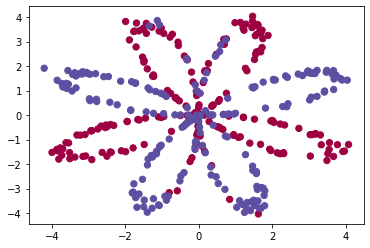

In [168]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of samples
    N = int(m / 2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()
print(X[:5])
print(Y[:5])
# (2, 400) (1, 400)

plt.scatter(X[0, :], X[1, :], c = Y, s=40, cmap=plt.cm.Spectral)

# 3 - Simple Logistic Regression

用sklearn来看下, 逻辑回归的分类情况
```python
sklearn.linear_model.LogisticRegressionCV()
```
结果是: 有将近50%的概率是正确的。用逻辑回归分类明显有问题。

In [274]:
logisticRegression = sklearn.linear_model.LogisticRegressionCV()
logisticRegression.fit(X.T, Y.T.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [275]:
# 画分界
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


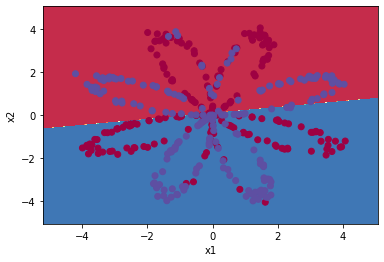

In [276]:
plot_decision_boundary(lambda x: logisticRegression.predict(x), X, Y)

# (400,)
# Print accuracy
LR_predictions = logisticRegression.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# 4 - Neural Network Model

![image](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/classification_kiank.png)

## 4.1 - Layer Sizes

- features: 2 (x1, x2)
- 1 hidden layer: (a1, a2, a3, a4)
- Layers: 2
- activation function: tanh

(1) $A1 = W1.T * A0 + b1$
W1 = 2 * 4 (一列为一组数据)
b1 = 4 * 1 (一列为一组数据)

A0 = 2 * samples
A1 = 4 * samples


(2) $A2 = W2.T * A1 + b2$
W2 = 4 * 1 (一列为一组数据)
b2 = 1 * 1 (一列为一组数据)


In [277]:
def layer_sizes (X, Y, n_hidden = 5):
    # 输入层 n_a0个数
    n_a0 = X.shape[0]
    # hidden层 node个数
    n_hidden = n_hidden
    # 输出层 node个数
    n_a1 = Y.shape[0]
    
    return n_a0, n_hidden, n_a1

# X = np.ones((2, 20))
# Y = np.ones((1, 20))
# n_a0, n_hidden, n_a1 = layer_sizes(X, Y)

## 4.2 - Initialize parameters

- W1, b1
- W2, b2

In [278]:
def initialize_parameters (n_a0, n_hidden, n_a1):
    # 一列为一组数据
    W1 = np.random.rand(n_a0, n_hidden)
    b1 = np.zeros(shape = (n_hidden, 1))
    
    W2 = np.random.rand(n_hidden, n_a1)
    b2 = np.zeros(shape = (n_a1, 1))
    
    return W1, b1, W2, b2

# W1, b1, W2, b2 = initialize_parameters(n_a0, n_hidden, n_a1)

# print("W1 = " + str(W1))
# print("b1 = " + str(b1))
# print("W2 = " + str(W2))
# print("b2 = " + str(b2))

## 4.3 - Activiation Function

In [279]:
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative (z):
    return z * (1 - z)

def tanh (z):
    return np.tanh(z)
    # return (np.exp(z) - np.exp(-z)) / np.exp(z) + np.exp(-z)
    
def tanh_derivative (z):
    return 1 - z.square()


## 4.3 - Forward Propagation

```
W1: 2 * 4
b1: 4 * 1
X: 2 * 20
A1: 4 * 20
```

$Z1 = np.dot(W1.T, X) + b1$ 

$A1 = tanh(Z1)$

```
W2: 4 * 1
b2: 1 * 1
A1: 4 * 20

A2: 1 * 20
```

$Z2 = np.dot(W2.T, A1) + b2$ 

$A2 = sigmoid(Z2)$

In [280]:
def forward_propagation (W1, b1, W2, b2, X):
    Z1 = np.dot(W1.T, X) + b1
    A1 = tanh(Z1)
    
    Z2 = np.dot(W2.T, A1) + b2
    A2 = sigmoid(Z2)
    
    return A1, A2
# A1, A2 = forward_propagation(W1, b1, W2, b2, X)

# 4.4 - Backward Propagation

```python

# 1. Cost Function
Loss = -y * log(a) - (1 - y) * log(1 - a)
J = 1/m * sum(Loss) => 1 * 1

# 2. dJ / dW2, dJ / db2
dJ_dA2 = - Y / A2  + (1 - Y)/(1 - A2)
dA2_dZ2 = A2 * (1 - A2)

# (1 * 20)
dJ_dZ2 = A2 - Y 

# 2.1 (1 * 20) 
# => 1 /m * sum(A2 - Y)
dJ_db2 = A2 - Y

# 2.2 (4 * 20) * (1 * 20).T = 4 * 1 
# => 1 / m * A1 * (A2 - Y).T
dJ_dW2 = A1 * (A2 - Y).T



# 3. dJ / dW1, dJ / db1

# (4 * 1) * (1 * 20) => 4 * 20
dZ2_dA1 = W2 * (A2 - Y)
dJ_dA1 = W2 * (A2 - Y)

# (tanh(Z))' = 1 - tanh(Z)^2
# dA1_dZ1 = 1 - tanh(Z1).square()
dA1_dZ1 = 1 - A1.square()
dJ_dZ1 = W2 * (A2 - Y) * (1 - A1.square())

# 3.1 
# W2: 4 * 1 dJ_dZ2: 1 * 20  (1 - A1.square(): 4 *  = 4 * 20
# X: 2* 20 * (4 * 20).T = dJ_dW1 (2 * 4)
# => 1 / m * dJ_dW1
dJ_dW1 = X * (W2 * (A2 - Y) * (1 - A1.square())).T = X * (W2 * dJ_dZ2 * (1 - A1.square())).T

# 3.2 
# 4 * 20
# 1 / m * sum(dJ_db1) => 4 * 1
dJ_db1 = W2 * dJ_dZ2 * (1 - A1.square())
```

In [281]:
def cost_function (Y, A):
    m = A.shape[1]
    epsilon = 1e-5
    loss = -Y * np.log(A + epsilon) - (1 - Y) * np.log(1 - A + epsilon)
    J = (1 / m) * np.sum(loss)
    return J

In [282]:
def backforward_propagation (W1, b1, W2, b2, X, Y, A1, A2):
    m = Y.shape[1]
    
    # J
    J = cost_function(Y, A2)
    
    # dJ_dZ2 = diff_2
    diff_2 = A2 - Y
    # dJ_dW2, dJ_db2
    dJ_dW2 = (1 / m) * np.dot(A1, diff_2.T) # 4 * 1
    dJ_db2 = 1 / m * np.sum(diff_2, axis = 1, keepdims = True) # 1 * 1
    
    # dJ_dZ1 = diff_1
    diff_1 = np.dot(W2, diff_2) * (1 - np.power(A1, 2))
    
    # dJ_dW1, dJ_db1
    dJ_dW1 = (1 / m) * np.dot(X, diff_1.T) # 2 * 4
    dJ_db1 = (1 / m) * np.sum(diff_1, axis = 1, keepdims = True) # 4 * 1
    
    return dJ_dW2, dJ_db2, dJ_dW1, dJ_db1

In [283]:
# dJ_dW2, dJ_db2, dJ_dW1, dJ_db1 = backforward_propagation (W1, b1, W2, b2, X, Y, A1, A2)

# 4.5 Train

- forward propagation
- backward propagation

In [303]:
def train (n_hidden):
    # hyperparameters:
    interations = 5000
    alpha = 1
    J_arr = []

    # layers
    n_a0, n_hidden, n_a1 = layer_sizes (X, Y, n_hidden)
    
    # parameters
    W1, b1, W2, b2 = initialize_parameters(n_a0, n_hidden, n_a1)
    
    for i in range(interations):
        # forward_propagation
        A1, A2 = forward_propagation (W1, b1, W2, b2, X)

        if i % 100 == 0:
            J_arr.append(cost_function(Y, A2))

        # backforward_propagation
        dJ_dW2, dJ_db2, dJ_dW1, dJ_db1 = backforward_propagation (W1, b1, W2, b2, X, Y, A1, A2)

        # gradient_descent
        W2 -= alpha * dJ_dW2
        b2 -= alpha * dJ_db2

        W1 -= alpha * dJ_dW1
        b1 -= alpha * dJ_db1
    
    return W1, b1, W2, b2, J_arr
    
W1, b1, W2, b2, J_arr = train(n_hidden = 10)
# print(J_arr[-1])

# 4.6 Predict

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 10')

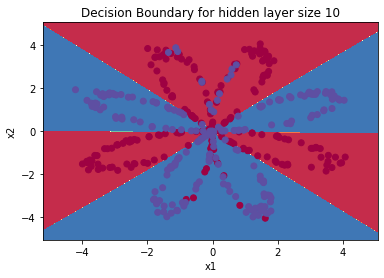

In [312]:
def predict (W1, b1, W2, b2, X):
    A1, A2 = forward_propagation (W1, b1, W2, b2, X)
    # eg: A2: 6.38639810e-01
    # eg: np.round(A2) = 1.0
    Y_predict = np.round(A2)
    return Y_predict

Y_predict = predict(W1, b1, W2, b2, X)
# 绘图
plot_decision_boundary(lambda x: predict(W1, b1, W2, b2, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(10))

In [313]:
def accuracy (Y, Y_predict):
    accuracy = (1 - np.mean(abs(Y_predict - Y))) * 100
    print('accuracy: %', format(accuracy))
    
accuracy(Y_predict, Y)

accuracy: % 90.0


# 5. Hidden Layers

Layers:  1
accuracy: % 67.25
----- end -----
Layers:  2
accuracy: % 67.0
----- end -----
Layers:  5
accuracy: % 89.5
----- end -----
Layers:  10
accuracy: % 90.75
----- end -----
Layers:  50
accuracy: % 91.75
----- end -----


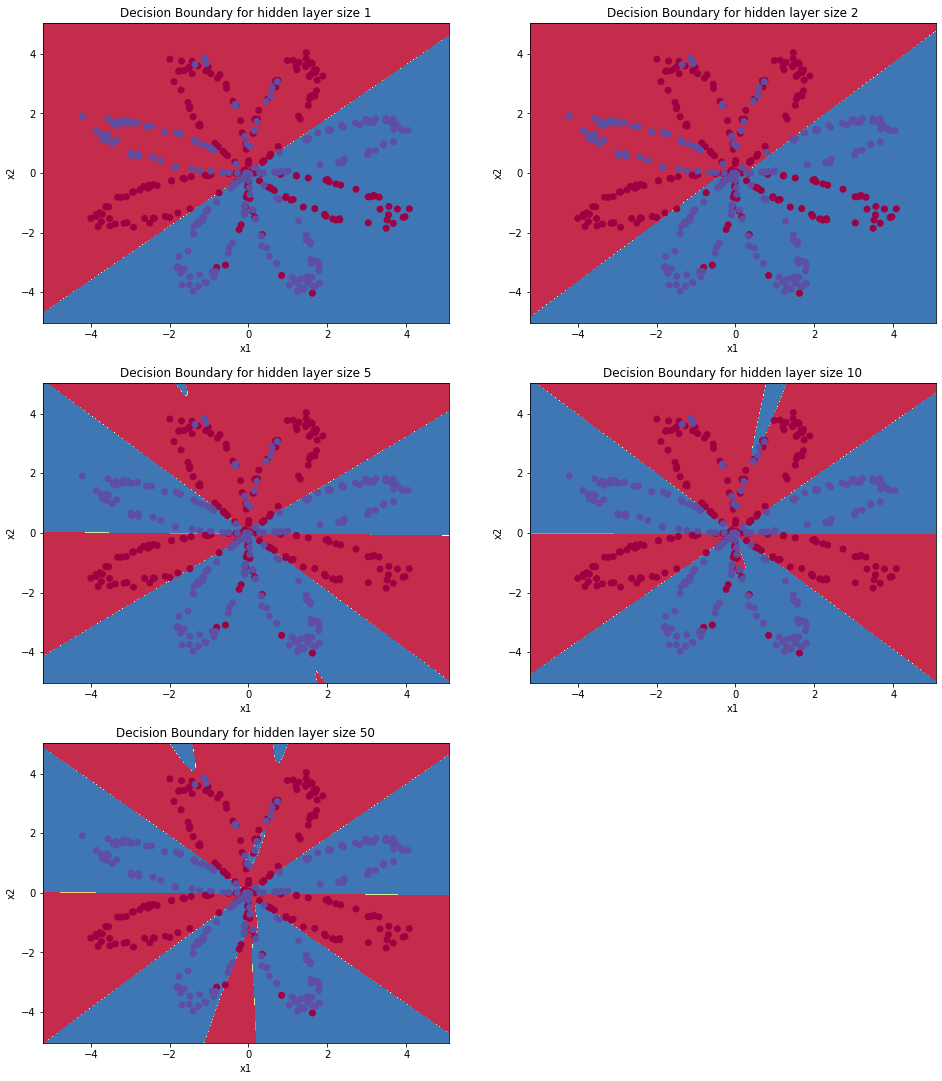

In [314]:
hidden_layers = [1, 2, 5, 10, 50]

plt.figure(figsize=(16, 32))

for i in range(len(hidden_layers)):
    plt.subplot(5, 2, i + 1)
    
    n_hidden = hidden_layers[i]
    print('Layers: ', n_hidden)
    W1, b1, W2, b2, J_arr = train(n_hidden)
    Y_predict = predict(W1, b1, W2, b2, X)
    
    plot_decision_boundary(lambda x: predict(W1, b1, W2, b2, x.T), X, Y)
    plt.title("Decision Boundary for hidden layer size " + str(n_hidden))
    
    accuracy(Y, Y_predict)
    print('----- end -----')